# Overview

# NOTE

# Assignment: 
   Exploratory Data Analysis(EDA) on Facebook Utilization Data

# Problem Statement:
The objective of the proposed framework is to study and analyse the differences in the way users
are using Facebook based on their gender, age-group, etc. and Identify a pattern out of it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [2]:
# Hides warning
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)

In [3]:
df = pd.read_csv('facebook user data - facebook user data.csv')

In [4]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(99003, 15)

In [6]:
# taking few numeric columns to see their basic statistics
df_data = df[['age','tenure','friend_count','likes','likes_received']]

# Data Cleaning & Analysis

In [7]:
df_data.describe()

,age,tenure,friend_count,likes,likes_received
count,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000
mean,37.280224,537.887375,196.350787,156.078785,142.689363
std,22.589748,457.649874,387.304229,572.280681,1387.919613
min,13.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,226.000000,31.000000,1.000000,1.000000
50%,28.000000,412.000000,82.000000,11.000000,8.000000
75%,50.000000,675.000000,206.000000,81.000000,59.000000
max,113.000000,3139.000000,4923.000000,25111.000000,261197.000000


In [8]:
# Checking for null values and we can see gender has-175 null values and tenure has 2. 
df.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [9]:
# looking at first 5 rows of the dataset
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [10]:
# quick info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

1) Load the data and impute missing values

<AxesSubplot:xlabel='tenure'>

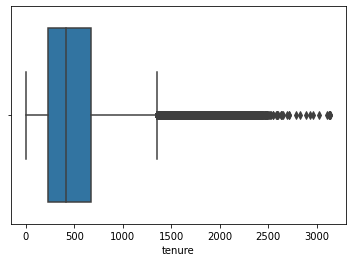

In [11]:
# Checking Data Distribution for 'Tenure' by ploting boxplot
sns.boxplot(df.tenure)

<AxesSubplot:xlabel='tenure', ylabel='Density'>

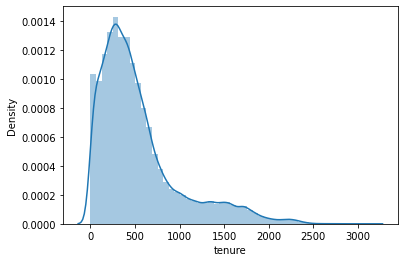

In [12]:
# Checking Data Distribution for 'Tenure' by ploting distribution plot
sns.distplot(df.tenure)

In [13]:
#tenure imputation with median as it is right-skwed
df['tenure'].fillna(df['tenure'].median() , inplace=True)

In [14]:
#imputing with mode b/c it is a catagorical value
df['gender'].fillna(df['gender'].mode()[0] , inplace=True) 

In [15]:
# Now after imputing the values we have zero null values.
df.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [16]:
df.shape

(99003, 15)

Checking for outliers

<AxesSubplot:>

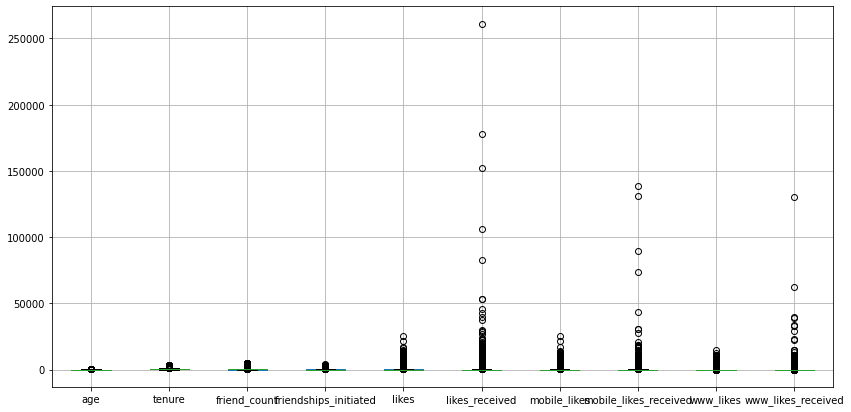

In [17]:
# As we can se there are very few values which are greater than 50k and they may distort the model accuracy in future , so we will remove them.
df.boxplot(column=['age','tenure','friend_count','friendships_initiated','likes','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received'], figsize=(14, 7))    

In [18]:
# removing values greater than 50000
df = df[df['likes_received'] <= 50000]
df = df[df['mobile_likes'] <= 50000]
df = df[df['mobile_likes_received'] <= 50000]
df = df[df['www_likes'] <= 50000]
df = df[df['www_likes_received'] <= 50000]

# df = df[df[['likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']] <= 50000]

<AxesSubplot:>

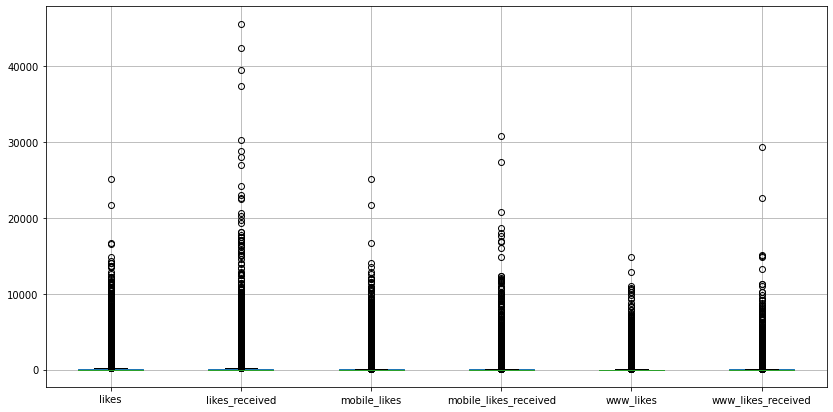

In [19]:
df.boxplot(column=['likes','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received'], figsize=(14, 7))

<AxesSubplot:>

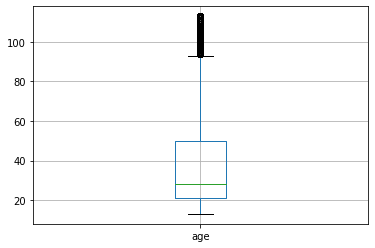

In [20]:
# checking outliers for age
df.boxplot(column=['age'])

In [21]:
# removing users having age greater than 90 b/c they don't affect the model much as they are few in numbers
df = df[df['age'] <= 90]

<AxesSubplot:>

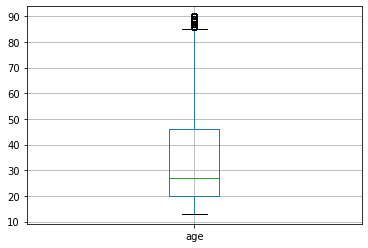

In [22]:
df.boxplot(column=['age']) #93280-shape 93273- 94090

In [23]:
df.shape

(94090, 15)

Data manipulation and Feature Engineering

In [24]:
df['Youth'] = df.age.apply(lambda x:1 if x<=30 else 0)
df['Millennials'] = df.age.apply(lambda x:1 if 30<x<=50 else 0)
df['Boomers'] = df.age.apply(lambda x:1 if 50<x<=70 else 0)
df['Post_War'] = df.age.apply(lambda x:1 if 70<x<=90 else 0)

For numeric data

For Categorical Data

In [25]:
# Defining Catagorical features
df_cat = df[['gender','Youth','Millennials','Boomers','Post_War']]
# Defining Numerical features
df_num = df[['age','tenure','friend_count','friendships_initiated','likes','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']]

2) Plot heatmap / correlation matrix on all the columns

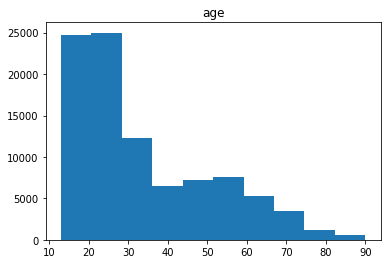

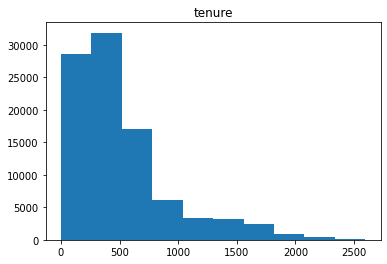

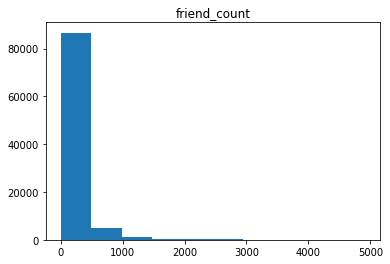

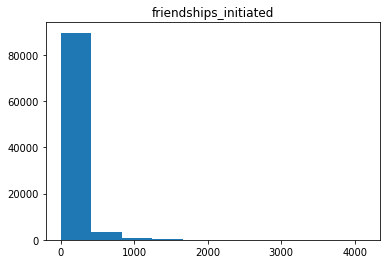

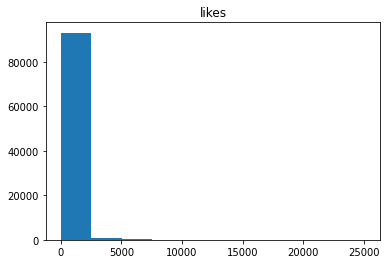

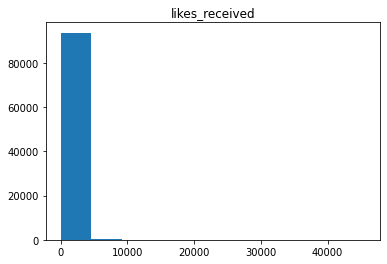

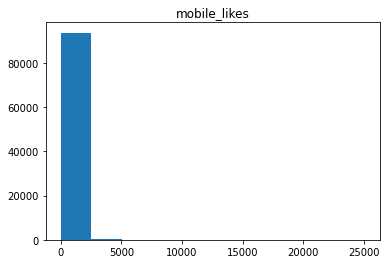

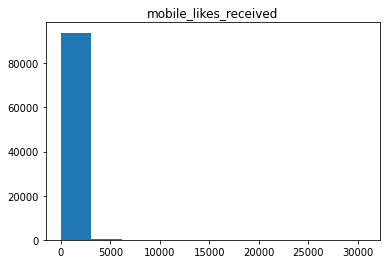

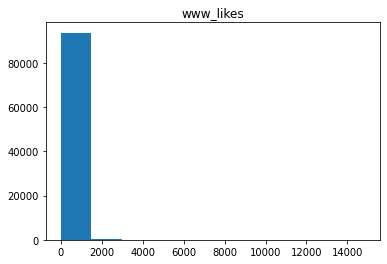

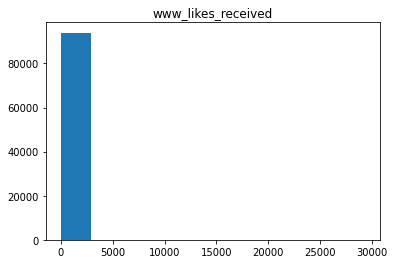

In [26]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [27]:
# correlation of all the columns w.r.t. each other
corr_matrix = pd.DataFrame(df_num.corr())
corr_matrix

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
age,1.000000,0.406893,-0.151008,-0.176141,-0.016628,-0.049414,-0.031845,-0.056368,0.016163,-0.032532
tenure,0.406893,1.000000,0.141175,0.111912,0.064040,0.067679,0.034294,0.058620,0.074771,0.069074
friend_count,-0.151008,0.141175,1.000000,0.831734,0.308546,0.450663,0.245434,0.442382,0.235869,0.391293
friendships_initiated,-0.176141,0.111912,0.831734,1.000000,0.293173,0.355394,0.236549,0.349781,0.218930,0.307365
likes,-0.016628,0.064040,0.308546,0.293173,1.000000,0.629483,0.870918,0.619494,0.647419,0.544474
likes_received,-0.049414,0.067679,0.450663,0.355394,0.629483,1.000000,0.487553,0.949604,0.501637,0.910502
mobile_likes,-0.031845,0.034294,0.245434,0.236549,0.870918,0.487553,1.000000,0.537852,0.189313,0.345150
mobile_likes_received,-0.056368,0.058620,0.442382,0.349781,0.619494,0.949604,0.537852,1.000000,0.403671,0.735004
www_likes,0.016163,0.074771,0.235869,0.218930,0.647419,0.501637,0.189313,0.403671,1.000000,0.552627
www_likes_received,-0.032532,0.069074,0.391293,0.307365,0.544474,0.910502,0.345150,0.735004,0.552627,1.000000


<AxesSubplot:>

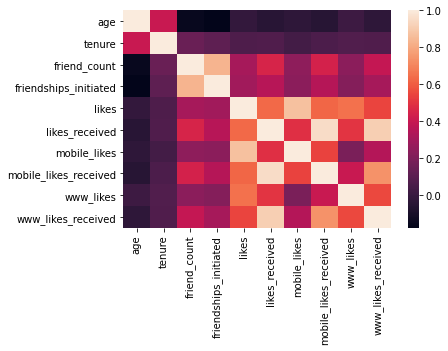

In [28]:
sns.heatmap(df_num.corr())

<AxesSubplot:>

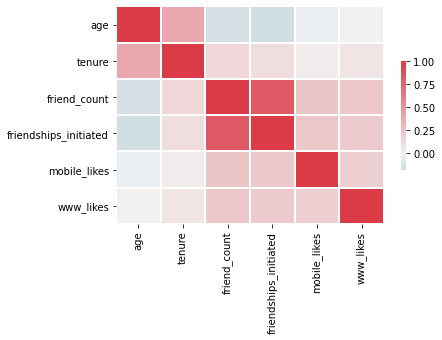

In [29]:
# Another heatmap with few features for more clearity
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','tenure','friend_count','friendships_initiated','mobile_likes', 'www_likes']].corr(),vmax=1.0, center=0, cmap=cmap,
            square=False, linewidths=.4, cbar_kws={"shrink": 0.5})

In [30]:
pd.pivot_table(df, index = 'gender', values = ['age','tenure','friend_count','likes','likes_received'])

,age,friend_count,likes,likes_received,tenure
gender,,,,,
female,36.229788,233.217052,263.762409,238.027585,559.997599
male,32.170928,153.469680,81.970612,62.253801,473.570250


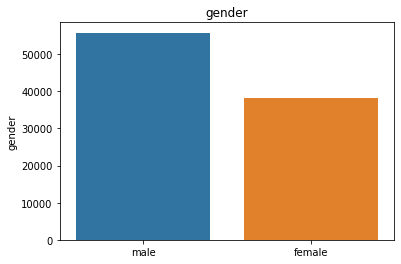

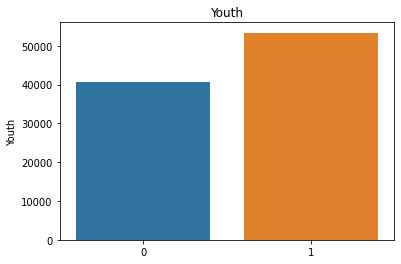

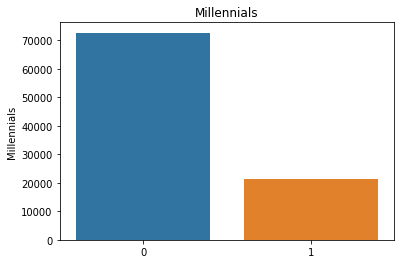

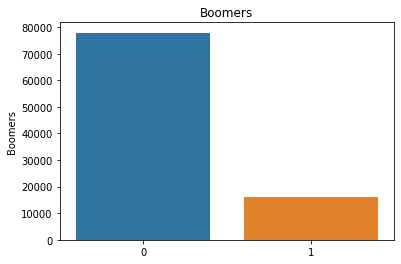

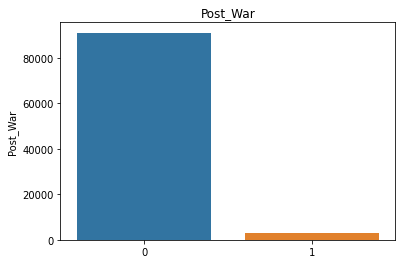

In [31]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [32]:
# Percentage of Boomers(age-[50-70]), Millennials([30-50]), Post_War([more than 70]) ,Youth([upto 30]) among female, male gender catagory
pd.pivot_table(df, index = 'gender', values = ['Youth','Millennials','Boomers','Post_War'])

,Boomers,Millennials,Post_War,Youth
gender,,,,
female,0.223916,0.224933,0.042121,0.509030
male,0.136162,0.230223,0.026035,0.607581


# 3) Analysis based on gender of the users

In [33]:
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,Youth,Millennials,Boomers,Post_War
count,9.409000e+04,94090.000000,94090.000000,94090.000000,94090.000000,94090.000000,94090.000000,94090.00000,94090.000000,94090.000000,94090.000000,94090.000000,94090.000000,94090.000000,94090.000000,94090.000000,94090.000000,94090.000000
mean,1.597187e+06,33.823892,14.529068,1979.176108,6.287097,508.767648,185.946668,103.16734,156.005027,133.837390,106.476650,78.644500,49.528313,55.192847,0.567446,0.228069,0.171899,0.032586
std,3.441226e+05,17.153293,8.992253,17.153293,3.521267,427.932070,371.645301,184.34189,576.650468,673.793377,447.578853,410.899881,288.601497,311.477389,0.495433,0.419589,0.377295,0.177551
min,1.000008e+06,13.000000,1.000000,1923.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298914e+06,20.000000,7.000000,1967.000000,3.000000,221.000000,29.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596143e+06,27.000000,14.000000,1986.000000,6.000000,399.000000,78.000000,44.00000,10.000000,8.000000,4.000000,4.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,1.896004e+06,46.000000,22.000000,1993.000000,9.000000,640.000000,195.000000,111.00000,79.000000,57.000000,45.000000,32.000000,6.000000,19.000000,1.000000,0.000000,0.000000,0.000000
max,2.193542e+06,90.000000,31.000000,2000.000000,12.000000,2595.000000,4917.000000,4144.00000,25111.000000,45633.000000,25111.000000,30754.000000,14865.000000,29337.000000,1.000000,1.000000,1.000000,1.000000


● What is composition of male and female users?

In [34]:
df.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received', 'Youth', 'Millennials', 'Boomers', 'Post_War'],
      dtype='object')

In [35]:
# Number of males and females
df.gender.value_counts()

male      55772
female    38318
Name: gender, dtype: int64

<!-- Encoding our Catagorical feature-Gender -->

In [36]:
# quick look at the statistics values
df.agg(
       { 
         "age": ["min", "max", "median","mean"],
         "tenure": ["min", "max", "median", "mean"],
         "friend_count": ["min", "max", "median", "mean"],
         "likes": ["min", "max", "median", "mean"],
         "likes_received": ["min", "max", "median", "mean"],
         "mobile_likes": ["min", "max", "median", "mean"],
        "www_likes": ["min", "max", "median", "mean"]
     }
 )

,age,tenure,friend_count,likes,likes_received,mobile_likes,www_likes
min,13.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
max,90.000000,2595.000000,4917.000000,25111.000000,45633.00000,25111.00000,14865.000000
median,27.000000,399.000000,78.000000,10.000000,8.00000,4.00000,0.000000
mean,33.823892,508.767648,185.946668,156.005027,133.83739,106.47665,49.528313


In [37]:
# calculating average values of users on basis of their gender for reference 
df.groupby(['gender']).mean()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,Youth,Millennials,Boomers,Post_War
gender,,,,,,,,,,,,,,,,,,
female,1.597815e+06,36.229788,15.047054,1976.770212,6.438384,559.997599,233.217052,111.719323,263.762409,238.027585,175.991649,138.403126,87.770656,99.624354,0.509030,0.224933,0.223916,0.042121
male,1.596755e+06,32.170928,14.173187,1980.829072,6.183156,473.570250,153.469680,97.291723,81.970612,62.253801,58.716560,37.587499,23.254016,24.666302,0.607581,0.230223,0.136162,0.026035


Which category of gender has more friends?

In [38]:
# We can see from the table that Female-Youth catagory has the highest friend_count and Male-Millennials has least
pd.pivot_table(df, index=['gender','Youth','Millennials','Boomers','Post_War'] ,values = ['friend_count'])

friend_count
gender Youth Millennials Boomers Post_War              
female 0     0           0       1           148.134449
                         1       0           120.656993
             1           0       0           125.605059
       1     0           0       0           337.323507
male   0     0           0       1           187.473829
                         1       0           117.945878
             1           0       0            92.313162
       1     0           0       0           183.146934

Which category of gender initiated more friendships?

In [39]:
# We can see from the table that Female-Youth catagory has the highest friendships_initiated
pd.pivot_table(df, index=['gender','Youth','Millennials','Boomers','Post_War'] ,values = 'friendships_initiated')

friendships_initiated
gender Youth Millennials Boomers Post_War                       
female 0     0           0       1                     65.798017
                         1       0                     63.031002
             1           0       0                     70.051166
       1     0           0       0                    155.349193
male   0     0           0       1                     91.732782
                         1       0                     64.744930
             1           0       0                     55.102414
       1     0           0       0                    120.810069

What is the distribution of tenure across different categories of gender?

In [40]:
# As we can see both female/male-Post war group has been on facebook around same tenure(no of days)
pd.pivot_table(df, index=['gender','Youth','Millennials','Boomers','Post_War'] ,values = 'tenure')

tenure
gender Youth Millennials Boomers Post_War            
female 0     0           0       1         977.755886
                         1       0         823.037296
             1           0       0         543.437754
       1     0           0       0         417.038708
male   0     0           0       1         998.880165
                         1       0         766.218199
             1           0       0         473.839875
       1     0           0       0         385.375111

# 4) Analysis based on the least active users on Facebook

How many users have no friends?

In [41]:
(df['friend_count'] == 0).sum()

1952

How many users did not like any posts?

In [42]:
(df['likes'] == 0).sum()

21831

How many users did not receive any likes

In [43]:
(df['likes_received'] == 0).sum()

23923

# 5) Analysis based on the user accessibility (Mobile Devices vs. Web Devices)

What is the average number of posts liked by users (based on gender) through web vs.
mobile devices?

In [44]:
# We can see significantly there are much more mobile users than web users, hence posts liked by mobile user are more.
pd.pivot_table(df, index=['gender','Youth','Millennials','Boomers','Post_War'] ,values = ['likes','mobile_likes','www_likes'])

likes  mobile_likes  \
gender Youth Millennials Boomers Post_War                             
female 0     0           0       1         161.353160     85.483271   
                         1       0         229.993240    124.070280   
             1           0       0         237.690567    175.563058   
       1     0           0       0         298.611997    206.509972   
male   0     0           0       1          84.835399     38.168733   
                         1       0          94.271794     56.190809   
             1           0       0          63.476324     50.161215   
       1     0           0       0          86.098920     63.404828   

                                            www_likes  
gender Youth Millennials Boomers Post_War              
female 0     0           0       1          75.869888  
                         1       0         105.922960  
             1           0       0          62.127277  
       1     0           0       0          92.101923  
male   0     0           0       1          46.666667  
                         1       0          38.080985  
             1           0       0          13.315031  
       1     0           0       0          22.694062

What is the average number of likes received by users (based on gender) through web
vs. mobile devices?

In [45]:
# Similary we can see likes received via mobile apps are significantly more.
pd.pivot_table(df, index=['gender','Youth','Millennials','Boomers','Post_War'] ,values = ['likes','mobile_likes_received','www_likes_received'])

likes  mobile_likes_received  \
gender Youth Millennials Boomers Post_War                                      
female 0     0           0       1         161.353160              42.689591   
                         1       0         229.993240              67.609790   
             1           0       0         237.690567             102.573500   
       1     0           0       0         298.611997             193.296950   
male   0     0           0       1          84.835399              37.994490   
                         1       0          94.271794              32.277719   
             1           0       0          63.476324              29.734579   
       1     0           0       0          86.098920              41.735614   

                                           www_likes_received  
gender Youth Millennials Boomers Post_War                      
female 0     0           0       1                  36.060719  
                         1       0                  68.699883  
             1           0       0                  73.888966  
       1     0           0       0                 129.859523  
male   0     0           0       1                  45.059229  
                         1       0                  26.910719  
             1           0       0                  18.404128  
       1     0           0       0                  25.662338